<a href="https://colab.research.google.com/github/kibrus/Pizza-steak-Classifier/blob/main/Pizza_steak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-07-18 16:37:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  55.5MB/s    in 1.9s    

2024-07-18 16:37:46 (55.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



#inspect the data (Become one with it)

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

#list number of files in pizza_steak directory
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


Visualize our images

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
#visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the targert directory
  target_folder = target_dir+target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read in the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


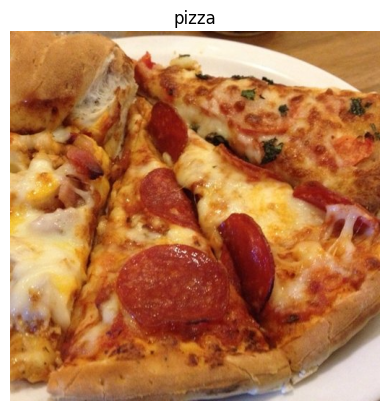

In [ ]:
#this return a big array or tenserflow data
img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[198, 133,  65],
        [193, 128,  62],
        [200, 135,  71],
        ...,
        [180, 125,  68],
        [179, 124,  68],
        [180, 125,  69]],

       [[195, 130,  62],
        [187, 122,  56],
        [189, 124,  60],
        ...,
        [180, 125,  68],
        [180, 125,  69],
        [180, 125,  69]],

       [[179, 114,  46],
        [184, 119,  53],
        [191, 123,  60],
        ...,
        [181, 126,  69],
        [180, 125,  68],
        [181, 126,  69]],

       ...,

       [[242, 222, 198],
        [241, 221, 197],
        [240, 220, 195],
        ...,
        [192, 174, 164],
        [179, 161, 151],
        [167, 149, 139]],

       [[239, 219, 195],
        [240, 220, 196],
        [241, 221, 196],
        ...,
        [175, 155, 146],
        [160, 140, 131],
        [147, 127, 116]],

       [[237, 217, 193],
        [239, 219, 195],
        [240, 220, 195],
        ...,
        [156, 136, 12

In [ ]:
img.shape #w h and rgb

(512, 512, 3)

In [ ]:
#get all the pixel values between 0 and 1
img/255

array([[[0.77647059, 0.52156863, 0.25490196],
        [0.75686275, 0.50196078, 0.24313725],
        [0.78431373, 0.52941176, 0.27843137],
        ...,
        [0.70588235, 0.49019608, 0.26666667],
        [0.70196078, 0.48627451, 0.26666667],
        [0.70588235, 0.49019608, 0.27058824]],

       [[0.76470588, 0.50980392, 0.24313725],
        [0.73333333, 0.47843137, 0.21960784],
        [0.74117647, 0.48627451, 0.23529412],
        ...,
        [0.70588235, 0.49019608, 0.26666667],
        [0.70588235, 0.49019608, 0.27058824],
        [0.70588235, 0.49019608, 0.27058824]],

       [[0.70196078, 0.44705882, 0.18039216],
        [0.72156863, 0.46666667, 0.20784314],
        [0.74901961, 0.48235294, 0.23529412],
        ...,
        [0.70980392, 0.49411765, 0.27058824],
        [0.70588235, 0.49019608, 0.26666667],
        [0.70980392, 0.49411765, 0.27058824]],

       ...,

       [[0.94901961, 0.87058824, 0.77647059],
        [0.94509804, 0.86666667, 0.77254902],
        [0.94117647, 0

## An end to end exmpale

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#set up path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data form directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

#Build a Cnn model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# #Fit the model
model_1_history = model_1.fit(train_data,
                              epochs=5,
                              steps_per_epoch = len(train_data),
                              validation_data = valid_data,
                              validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 230ms/step - loss: 0.5893 - accuracy: 0.6800 - val_loss: 0.4060 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4305 - accuracy: 0.8120 - val_loss: 0.3593 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4032 - accuracy: 0.8167 - val_loss: 0.3127 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.3510 - accuracy: 0.8580 - val_loss: 0.3127 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3010 - accuracy: 0.8807 - val_loss: 0.3007 - val_accuracy: 0.8820


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
#trying a non-CNN model on out image data
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 142ms/step - loss: 0.6933 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 158ms/step - loss: 0.6932 - accuracy: 0.4560 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 139ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 151ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
history_2 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 20s 405ms/step - loss: 2.1825 - accuracy: 0.6507 - val_loss: 3.0985 - val_accuracy: 0.5100
Epoch 2/5
47/47 [==============================] - 19s 411ms/step - loss: 0.8744 - accuracy: 0.7233 - val_loss: 0.4361 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 19s 401ms/step - loss: 0.7467 - accuracy: 0.7120 - val_loss: 0.4472 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 20s 421ms/step - loss: 0.5596 - accuracy: 0.7707 - val_loss: 1.0052 - val_accuracy: 0.6620
Epoch 5/5
47/47 [==============================] - 20s 411ms/step - loss: 0.7825 - accuracy: 0.7293 - val_loss: 0.5233 - val_accuracy: 0.7640


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


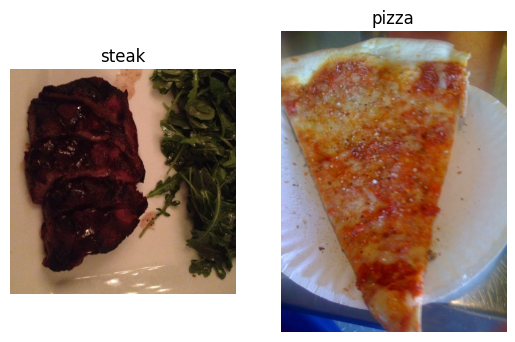

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/', "pizza")

In [ ]:
#Preprocess the data

#Define director dataset path
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#Turn out data into "Batches"

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
#create train and test data hgenerators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
#Load in our image data from dirextories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (224,224),
                                             class_mode='binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
#Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
images[6].shape

(224, 224, 3)

In [ ]:
#view the first batch labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [ ]:
#create CNN model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

#creat the model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='same',
           activation= 'relu',
           input_shape =(224,224,3)),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')

])

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 484000)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486101 (1.85 MB)
Trainable params: 486101 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 114s 2s/step - loss: 0.7370 - accuracy: 0.7087 - val_loss: 0.4354 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 111s 2s/step - loss: 0.4349 - accuracy: 0.8087 - val_loss: 0.4200 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 123s 3s/step - loss: 0.3303 - accuracy: 0.8713 - val_loss: 0.3090 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 113s 2s/step - loss: 0.2118 - accuracy: 0.9220 - val_loss: 0.3475 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 110s 2s/step - loss: 0.1242 - accuracy: 0.9613 - val_loss: 0.4651 - val_accuracy: 0.8140


<Axes: >

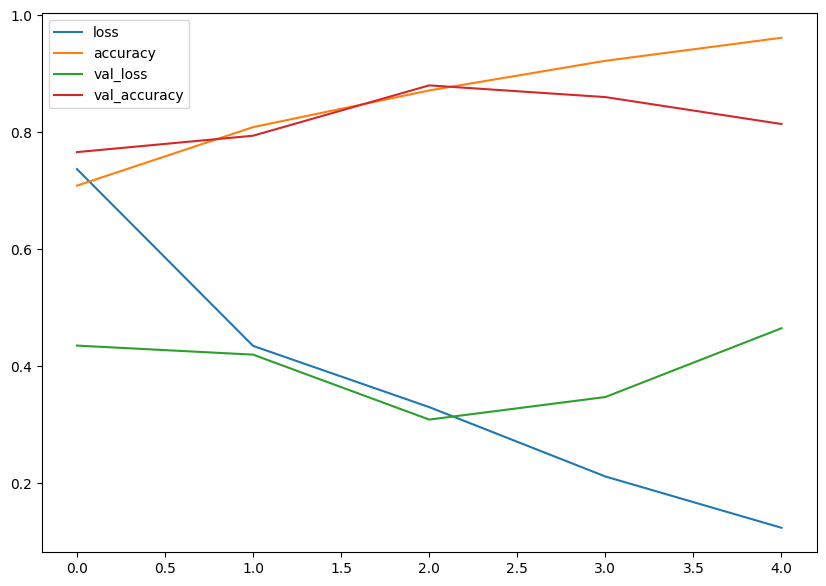

In [ ]:
#Evaluating out model
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

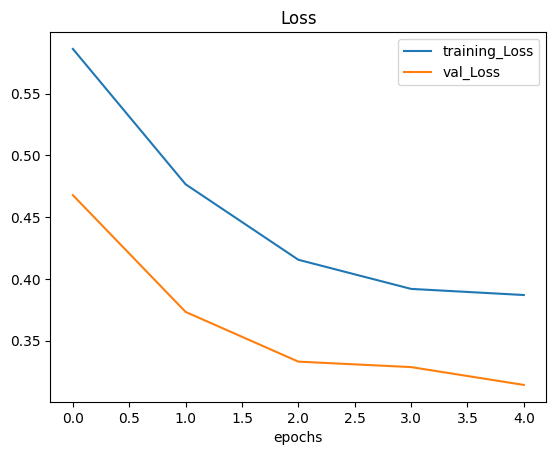

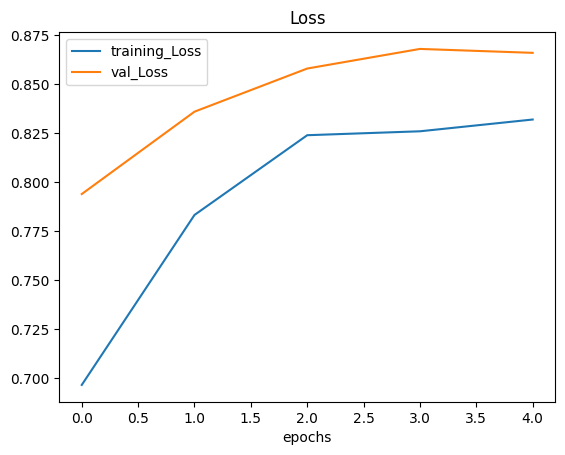

In [ ]:
#plot the validatio and training curves separatlely
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracuy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs, loss, label="training_Loss")
  plt.plot(epochs, val_loss, label="val_Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()
  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_Loss")
  plt.plot(epochs, val_accuracuy, label="val_Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

plot_loss_curves(history_5)

In [ ]:
#create CNN model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

#creat the model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='same',
           activation= 'relu',
           input_shape =(224,224,3)),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')

])

In [ ]:
#creat a model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='same',
           activation='relu',
           input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))
#import data and augment it from training directory
datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip="true",
    fill_mode= 'nearest'
)

train_data_augmented = datagen.flow_from_directory(train_dir,
                                                   target_size=(224,224,3),
                                                   batch_size=32,
                                                   class_mode='binary',
                                                   shuffle='false')

Epoch 1/5
47/47 [==============================] - 9s 139ms/step - loss: 0.5861 - accuracy: 0.6967 - val_loss: 0.4677 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4765 - accuracy: 0.7833 - val_loss: 0.3732 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4154 - accuracy: 0.8240 - val_loss: 0.3329 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3918 - accuracy: 0.8260 - val_loss: 0.3285 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3869 - accuracy: 0.8320 - val_loss: 0.3141 - val_accuracy: 0.8660


NameError: name 'true' is not defined

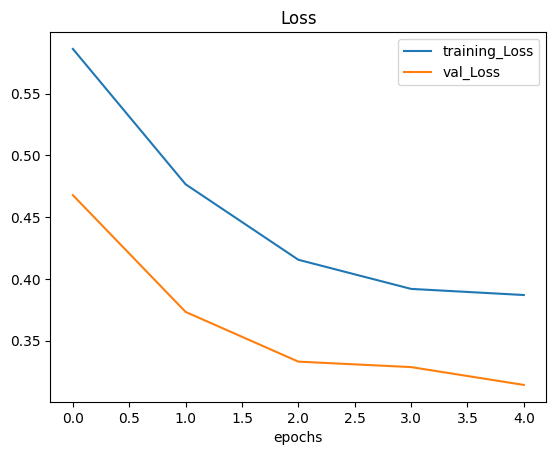

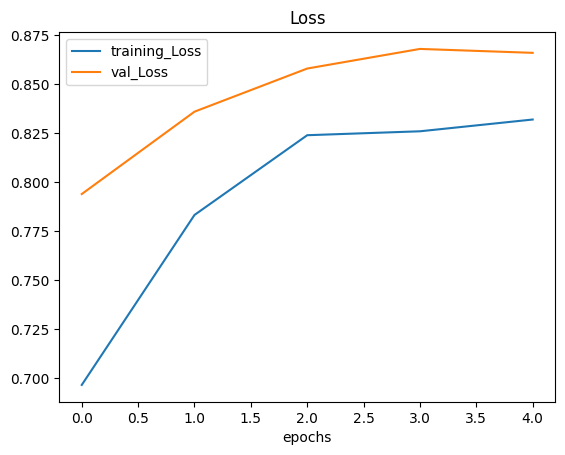

In [ ]:
#plot the validatio and training curves separatlely
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracuy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs, loss, label="training_Loss")
  plt.plot(epochs, val_loss, label="val_Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()
  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_Loss")
  plt.plot(epochs, val_accuracuy, label="val_Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

plot_loss_curves(history_5)

In [ ]:
#import data and augment it from training directory
datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip="true",
    fill_mode= 'nearest'
)

train_data_augmented = datagen.flow_from_directory(train_dir,
                                                   target_size = (224,224),
                                                   batch_size=32,
                                                   class_mode='binary',
                                                   shuffle='true')

Found 1500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam

model_6 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides = 1,
           padding='valid',
           activation = 'relu'
           ),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation= 'sigmoid')
])

model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])
history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 24s 455ms/step - loss: 0.6766 - accuracy: 0.5567 - val_loss: 0.6189 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5688 - accuracy: 0.7207 - val_loss: 0.4017 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 22s 461ms/step - loss: 0.5152 - accuracy: 0.7433 - val_loss: 0.3735 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 21s 445ms/step - loss: 0.4859 - accuracy: 0.7727 - val_loss: 0.4532 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 21s 432ms/step - loss: 0.4868 - accuracy: 0.7747 - val_loss: 0.3866 - val_accuracy: 0.8320


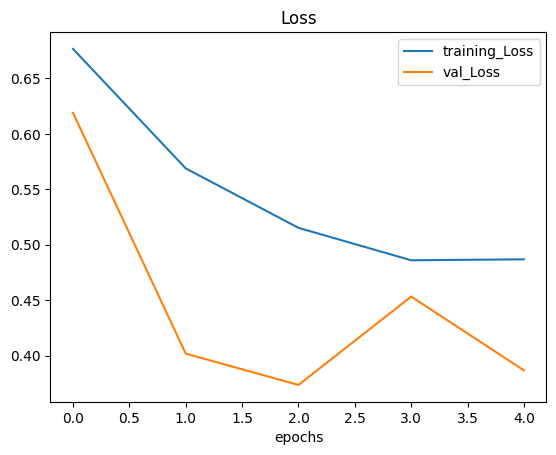

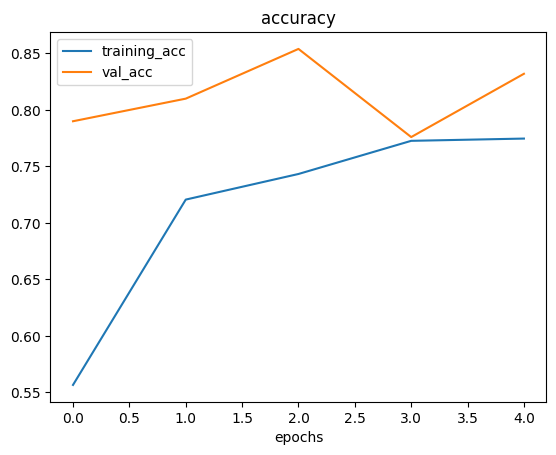

In [ ]:
#plot the validatio and training curves separatlely
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracuy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs, loss, label="training_Loss")
  plt.plot(epochs, val_loss, label="val_Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()
  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_acc")
  plt.plot(epochs, val_accuracuy, label="val_acc")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

plot_loss_curves(history_6)

In [ ]:
##clasess
print(class_names)

['pizza' 'steak']


In [ ]:
# view example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2024-07-18 16:54:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2024-07-18 16:54:03 (38.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



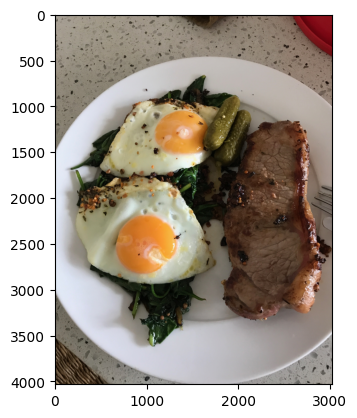

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)

In [ ]:
model_6.predict(steak)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv2d_4" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 3024, 3)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 3024, 3), dtype=uint8)
      • training=False
      • mask=None


In [ ]:
def load_and_prep_image(filename, img_shape=224):
    #read in the image
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    #resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    #rescale the image
    img=img/225.
    return img


In [ ]:
#load in and preprocess out image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [ ]:
prep = model_6.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 30ms/step


In [ ]:
pred_class = class_names[int(tf.round(prep))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  #load the image
  img = load_and_prep_image(filename)
  #make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  #plot
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 18ms/step


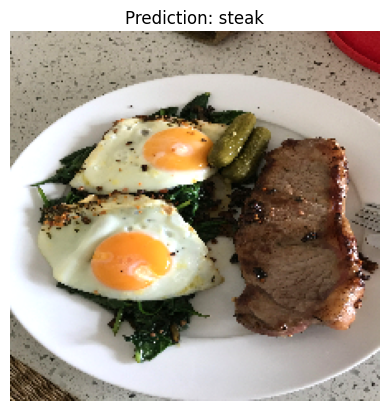

In [ ]:
#test
pred_and_plot(model_6, "03-steak.jpeg")

--2024-07-18 17:26:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2024-07-18 17:26:04 (58.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 17ms/step


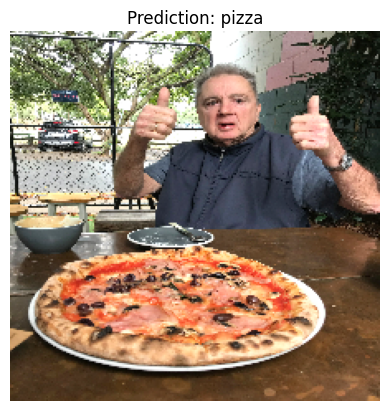

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_6, "03-pizza-dad.jpeg")